# Web Scraping de Dados de Livros para Análise e Visualização

A explosão do mercado editorial digital e o vasto volume de informações disponíveis online tornam a coleta e análise de dados essenciais para entender tendências, preços e disponibilidade de produtos. Neste trabalho, embarcaremos em um projeto de Web Scraping para extrair informações valiosas de um catálogo online de livros. Nosso objetivo é não apenas coletar esses dados de forma automatizada, mas também organizá-los e, em seguida, realizar análises exploratórias e visualizações que permitam insights sobre o mercado de livros.

## Sobre o Conjunto de Dados

O conjunto de dados para este estudo será construído por meio de raspagem de dados (web scraping) do site books.toscrape.com. Este site é uma plataforma fictícia, criada especificamente para fins de aprendizado e prática de web scraping. Ele oferece um catálogo diversificado de livros com informações como título, link, preço e status de estoque. Por ser um ambiente controlado e didático, é ideal para demonstrar as técnicas de coleta e processamento de dados de forma segura e ética, sem impactar sites reais.

## Etapas do Projeto

Este projeto foi desenvolvido seguindo as seguintes etapas principais:

- **Coleta dos Dados:** Utilização de bibliotecas Python como requests e BeautifulSoup para raspar automaticamente as informações dos livros do site books.toscrape.com.
- **Exploração dos Dados:** Realização de análises estatísticas descritivas e criação de visualizações (gráficos de histograma para preços, gráficos de barras para estoque) para entender a distribuição e características dos dados coletados.
- **Armazenamento dos Dados:** Exportação do conjunto de dados limpo e organizado para formatos acessíveis como arquivos Excel (.xlsx) e CSV (.csv) para uso futuro ou compartilhamento.

## Importando as Bibliotecas Necessárias

- requests para fazer requisições web 
- BeautifulSoup para analisar o HTML das páginas
- pandas para criar e manipular DataFrames e exportá-los.
- matplotlib para a criação de gráficos
- seaborn para a criação de gráficos

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Definindo uma variável pagina_atual para controlar a página atual que está sendo raspada, começando da página 1.
- Criando uma lista vazia chamada dados onde as informações de cada livro serão armazenadas temporariamente.

In [2]:
pagina_atual = 1

dados = []

## Loop de Raspagem (Enquanto houver páginas)

In [3]:
continuar_raspagem = True

while(continuar_raspagem):
    print("Raspando página atualmente: "+str(pagina_atual))

    url = "https://books.toscrape.com/catalogue/page-"+str(pagina_atual)+".html"
    
    soup = BeautifulSoup(pagina_web.text,"html.parser")

    if soup.title.text == "404 Not Found":
        continuar_raspagem = False
    else:
        todos_livros = soup.find_all("li",class_="col-xs-6 col-sm-4 col-md-3 col-lg-3")

        for livro in todos_livros:
            item_livro = {}

            item_livro['Titulo'] = livro.find("img").attrs["alt"]

            item_livro['Link'] = "https://books.toscrape.com/catalogue/"+livro.find("a").attrs["href"]

            item_livro['Preco'] = livro.find("p", class_="price_color").text[2:]

            item_livro['Estoque'] = livro.find("p", class_="instock availability").text.strip()

            dados.append(item_livro)

    pagina_atual += 1

Raspando página atualmente: 1
Raspando página atualmente: 2
Raspando página atualmente: 3
Raspando página atualmente: 4
Raspando página atualmente: 5
Raspando página atualmente: 6
Raspando página atualmente: 7
Raspando página atualmente: 8
Raspando página atualmente: 9
Raspando página atualmente: 10
Raspando página atualmente: 11
Raspando página atualmente: 12
Raspando página atualmente: 13
Raspando página atualmente: 14
Raspando página atualmente: 15
Raspando página atualmente: 16
Raspando página atualmente: 17
Raspando página atualmente: 18
Raspando página atualmente: 19
Raspando página atualmente: 20
Raspando página atualmente: 21
Raspando página atualmente: 22
Raspando página atualmente: 23
Raspando página atualmente: 24
Raspando página atualmente: 25
Raspando página atualmente: 26
Raspando página atualmente: 27
Raspando página atualmente: 28
Raspando página atualmente: 29
Raspando página atualmente: 30
Raspando página atualmente: 31
Raspando página atualmente: 32
Raspando página a

## Exportação dos Dados:

Salvando este DataFrame em dois formatos:
- **livros.xlsx:** Um arquivo de planilha Excel.
- **livros.csv:** Um arquivo CSV.

In [4]:
df_livros = pd.DataFrame(dados)
df_livros.to_excel("livros.xlsx", index=False) # Adicionado index=False para não salvar o índice como coluna
df_livros.to_csv("livros.csv", encoding='utf-8-sig', index=False) # Usando 'utf-8-sig' e index=False para melhor compatibilidade

## Lendo o arquivo CSV

In [6]:
df= pd.read_csv("livros.csv")

## Visualizando o shape, as primeiras e ultimas 5 linhas do dataset com 'display'

In [7]:
display(df)

,Titulo,Link,Preco,Estoque
0,A Light in the Attic,https://books.toscrape.com/catalogue/a-light-i...,51.77,In stock
1,Tipping the Velvet,https://books.toscrape.com/catalogue/tipping-t...,53.74,In stock
2,Soumission,https://books.toscrape.com/catalogue/soumissio...,50.10,In stock
3,Sharp Objects,https://books.toscrape.com/catalogue/sharp-obj...,47.82,In stock
4,Sapiens: A Brief History of Humankind,https://books.toscrape.com/catalogue/sapiens-a...,54.23,In stock
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,https://books.toscrape.com/catalogue/alice-in-...,55.53,In stock
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",https://books.toscrape.com/catalogue/ajin-demi...,57.06,In stock
997,A Spy's Devotion (The Regency Spies of London #1),https://books.toscrape.com/catalogue/a-spys-de...,16.97,In stock
998,1st to Die (Women's Murder Club #1),https://books.toscrape.com/catalogue/1st-to-di...,53.98,In stock


## Visualizando informações básicas do dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Titulo   1000 non-null   object 
 1   Link     1000 non-null   object 
 2   Preco    1000 non-null   float64
 3   Estoque  1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


## Verificando se há algum valor nulo

In [10]:
df.isnull().sum()

Titulo     0
Link       0
Preco      0
Estoque    0
dtype: int64

# Análise Exploratória dos dados (EDA)

In [11]:
df.describe()

,Preco
count,1000.00000
mean,35.07035
std,14.44669
min,10.00000
25%,22.10750
50%,35.98000
75%,47.45750
max,59.99000


## Gráfico de Histograma para a Distribuição de Preços

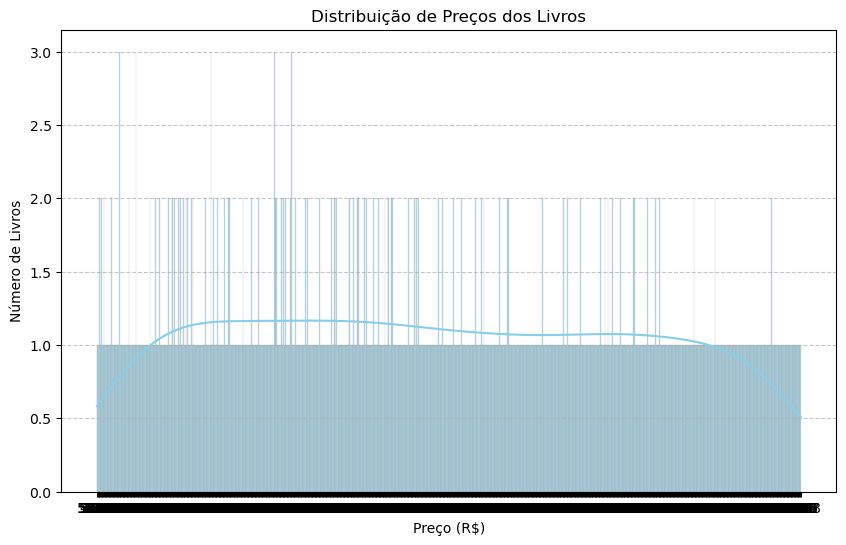

In [16]:
plt.figure(figsize=(10, 6)) # Define o tamanho da figura (largura, altura)
sns.histplot(df_livros['Preco'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição de Preços dos Livros')
plt.xlabel('Preço (R$)')
plt.ylabel('Número de Livros')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona uma grade horizontal
plt.show()

## Análise Estatística da Coluna 'Preco'

- **count (Contagem): 1000.00000**

Isso significa que o seu DataFrame contém informações de 1000 livros. Cada linha representa um livro, e para todos eles, há um valor de preço. Isso é um bom indicativo de que a raspagem foi bem-sucedida em coletar dados de mil itens.

- **mean (Média): 35.07035**

O preço médio dos livros no dataset é de aproximadamente 35,07 reais. Essa é uma medida de tendência central que nos dá uma ideia do "preço típico" dos livros.

- **std (Desvio Padrão): 14.44669**

O desvio padrão mede a dispersão dos preços em relação à média. Um valor de 14,45 reais indica que os preços dos livros não estão muito concentrados em torno da média de 35,07 reais. Há uma variação considerável, ou seja, você encontrará livros com preços significativamente acima e abaixo da média.

- **min (Mínimo): 10.00000**

O preço mais baixo encontrado entre os 1000 livros é de 10,00 reais.

- **25% (Primeiro Quartil): 22.10750**

Isso significa que 25% dos livros custam até 22,11 reais. É o limite inferior dos preços da maioria dos livros mais baratos.

- **50% (Mediana): 35.98000**

A mediana é o preço que divide os dados exatamente ao meio. 50% dos livros custam até 35,98 reais e 50% custam mais que 35,98 reais. Note que a mediana (35,98 reais) está bem próxima da média (35,07 reais), o que sugere que a distribuição dos preços é relativamente simétrica, sem muitos valores extremos puxando a média para um lado.

## Insights sobre o Preço dos Livros:

Com base nesses dados, podemos dizer que você tem uma coleção de preços de mil livros com uma boa faixa de valores, começando em 10,00 reais e com a maioria dos livros agrupados em torno dos 35 reais a 36 reais. A variação de 14,45 reais no desvio padrão é esperada em um catálogo de livros.

## Verificando a quantidade de livros em estoque

In [22]:
livros_em_estoque = df_livros[df_livros['Estoque'] == 'In stock'].shape[0]
print(f"Total de livros 'In stock': {livros_em_estoque}")

Total de livros 'In stock': 1000


## Gráfico de Barras para a Quantidade de Livros em Estoque

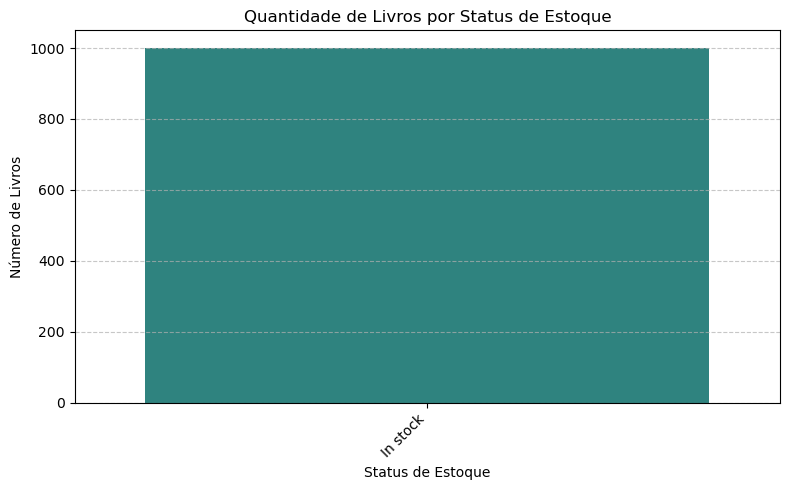

In [17]:
# Contar a ocorrência de cada status de estoque
contagem_estoque = df_livros['Estoque'].value_counts()

plt.figure(figsize=(8, 5)) # Define o tamanho da figura
sns.barplot(x=contagem_estoque.index, y=contagem_estoque.values, palette='viridis')
plt.title('Quantidade de Livros por Status de Estoque')
plt.xlabel('Status de Estoque')
plt.ylabel('Número de Livros')
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona uma grade horizontal
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

## Insights sobre a Quantidade de Livros em Estoque:

Isso significa que todos os 1000 livros no seu dataset estão marcados como "In stock", ou seja, nenhum está esgotado pelos dados que você raspou